In [117]:
from keras.models import Sequential 
from keras.layers import Dense, SimpleRNN, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from keras.metrics import MeanSquaredError 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tldextract
import matplotlib.pyplot as plt
import re

In [32]:
def shortening_service(full_url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      full_url)
    if match:
        return 1
    else:
        return 0

In [130]:
def confirm_result(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    R2 = r2_score(y_test, y_pred)
    
    pd.options.display.float_format = '{:.5f}'.format
    Result = pd.DataFrame(data=[MAE,RMSE, R2],
                         index = ['MAE','RMSE', 'R2'],
                         columns=['Results'])
    return Result

In [163]:
def GRU_model(X_train, y_train, X_test):
    # 모델 만들기    
    # GRU 아키텍처 (architecture )
    my_GRU_model = Sequential()
    my_GRU_model.add(Embedding(len(X_train), 100, input_length=100))
    my_GRU_model.add(GRU(units = 150, 
                         return_sequences = True,  
                         activation = 'tanh'))
    my_GRU_model.add(Dropout(0.5))
    my_GRU_model.add(GRU(units = 150, 
                         activation = 'tanh'))
    my_GRU_model.add(Dense(units=1))
    
    # 컴파일링 (Compiling)
    my_GRU_model.compile(optimizer = SGD(learning_rate = 0.01, decay = 1e-7, 
                                         momentum = 0.9, nesterov = False), 
                         loss = 'mean_squared_error')
    print('start fitting')
    # 피팅하기 (Fitting)
    my_GRU_model.fit(X_train, y_train, epochs = 300, batch_size = 64, verbose = 0)
    
    print('start prediction')
    GRU_prediction = my_GRU_model.predict(X_test)
    
    return my_GRU_model, GRU_prediction 

In [66]:
df=pd.read_csv('shortURL/dataset_phishing.csv')

In [67]:
df_URL=df[['url', 'shortening_service']]

In [68]:
df_URL['domain']=df_URL['url']

/home/hs/hs-AI/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
ext = tldextract.extract(df_URL['url'][0])

In [70]:
ext.fqdn

'www.crestonwood.com'

In [71]:
def Preprocessing(df):
    domain_list=[]
    for i in df['url']:
        if i.startswith('h'):
            domain_list.append(i[0:i.find('/', 8)])
        else:
            domain_list.append(i[0:i.find('/', )])

    df['domain']=domain_list

    return df

In [72]:
df_URL=Preprocessing(df_URL)

/home/hs/hs-AI/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [73]:
df_URL.drop('url', axis=1, inplace=True)

/home/hs/hs-AI/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [79]:
tokenizer = Tokenizer(char_level=True)

In [81]:
tokenizer.fit_on_texts(df_URL['domain'])

In [82]:
df_URL_encoded = np.array(tokenizer.texts_to_sequences(df_URL['domain']))

/home/hs/hs-AI/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(array([8.583e+03, 2.405e+03, 4.050e+02, 2.500e+01, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 7.000e+00]),
 array([ 11.,  32.,  53.,  74.,  95., 116., 137., 158., 179., 200., 221.]),
 <BarContainer object of 10 artists>)

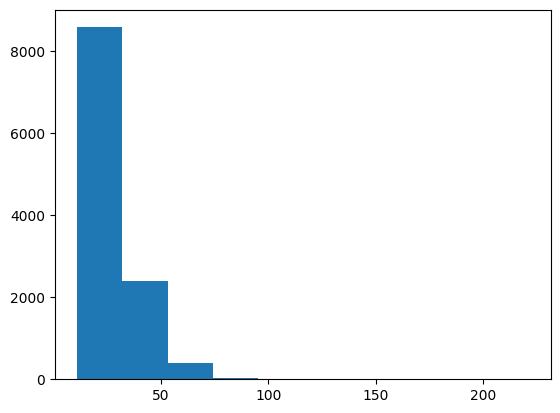

In [86]:
plt.hist([len(x) for x in df_URL_encoded])

In [87]:
df_URL_encoded = pad_sequences(df_URL_encoded, maxlen=100)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(df_URL_encoded, df_URL['shortening_service'], test_size = 0.25, random_state = 32)

In [164]:
my_GRU_model, GRU_prediction = GRU_model(X_train, y_train, X_test)

start fitting
start prediction


In [165]:
confirm_result(y_test, GRU_prediction)

,Results
MAE,0.01916
RMSE,0.09321
R2,0.92379


In [166]:
my_GRU_model.save('shortURL/GRU_model.h5')

In [120]:
#       Results     epoch 100
# MAE   0.05777 
# RMSE  0.12122
# R2    0.87109

# 	    Results     epoch 200
# MAE	0.02804
# RMSE	0.09633
# R2	0.91859

# second GRU units 100 > 150
# 	    Results
# MAE	0.02990
# RMSE	0.09523
# R2	0.92045

# add DropOut Layer before Dense Layer, batchSize 64 > 128
# 	    Results
# MAE	0.04688
# RMSE	0.11315
# R2	0.88769

# batch size rollback to 64
# 	Results
# MAE	0.03904
# RMSE	0.10343
# R2	0.90615

#change position of dropout layer before denselayer to between GRU layers 
# 	    Results
# MAE	0.01974
# RMSE	0.09708
# R2	0.91733

# first GRU units 100 > 150
# 	    Results
# MAE	0.02085
# RMSE	0.09456
# R2	0.92156

# second GRU units 150 > 200 and add Dense layer(units=50) next to GRU layer
#       Results
# MAE	0.02990
# RMSE	0.09700
# R2	0.91747

# delete Dense layer(units=50) next to GRU layer
# 	    Results
# MAE	0.02258
# RMSE	0.09749
# R2	0.91663

#delete dropout layer between GRU layer second GRU units 200 > 150
# Results
# MAE	0.03578
# RMSE	0.09549
# R2	0.92002

# epoch 300
#       Results
# MAE	0.01916
# RMSE	0.09321
# R2	0.92379

